In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import tensorflow as tf
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-types-dataset/Dataset/test/n95/369.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/355.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/377.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/366.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/359.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/361.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/380.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/379.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/375.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/396.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/362.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/372.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/388.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/374.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/368.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/

In [45]:
import matplotlib.pyplot as plt



In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

In [10]:
train_dir = '/kaggle/input/face-mask-types-dataset/Dataset/train'
test_dir = '/kaggle/input/face-mask-types-dataset/Dataset/test'

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 1956 images belonging to 5 classes.
Found 330 images belonging to 5 classes.


# ResNETV2

In [17]:
# Define the InceptionResNetV2 model as the base model
weights_path = '/kaggle/input/resnet/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = InceptionResNetV2(include_top=False, weights=weights_path, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

In [18]:
model = Model(inputs=base_model.input, outputs=predictions)

In [19]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [20]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)

Epoch 1/10
62/62 [==============================] - 280s 4s/step - loss: 0.8338 - accuracy: 0.6697 - val_loss: 0.6474 - val_accuracy: 0.7333
Epoch 2/10
62/62 [==============================] - 257s 4s/step - loss: 0.5391 - accuracy: 0.7950 - val_loss: 0.5603 - val_accuracy: 0.7788
Epoch 3/10
62/62 [==============================] - 258s 4s/step - loss: 0.4932 - accuracy: 0.8206 - val_loss: 0.5550 - val_accuracy: 0.7606
Epoch 4/10
62/62 [==============================] - 257s 4s/step - loss: 0.4905 - accuracy: 0.8119 - val_loss: 0.5001 - val_accuracy: 0.8242
Epoch 5/10
62/62 [==============================] - 260s 4s/step - loss: 0.4627 - accuracy: 0.8211 - val_loss: 0.4770 - val_accuracy: 0.8394
Epoch 6/10
62/62 [==============================] - 257s 4s/step - loss: 0.4048 - accuracy: 0.8451 - val_loss: 0.4806 - val_accuracy: 0.8152
Epoch 7/10
62/62 [==============================] - 260s 4s/step - loss: 0.4081 - accuracy: 0.8497 - val_loss: 0.5064 - val_accuracy: 0.8061
Epoch 8/10
62

In [22]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

11/11 [==============================] - 36s 3s/step - loss: 0.6053 - accuracy: 0.7576
Test accuracy: 0.7575757503509521


In [23]:
# Saving the model
model.save('face_mask_classification.h5')

In [24]:
# Load the trained model
model = tf.keras.models.load_model('face_mask_classification.h5')

In [61]:
# Load the image and preprocess it
img = cv2.imread("/kaggle/input/image-data/0.jpg")
img = cv2.resize(img, (224, 224))
img_array = np.expand_dims(img, axis=0)
img_array = img_array.astype('float32') / 255.0

In [29]:
prediction = model.predict(img_array)

1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 0s 188ms/step


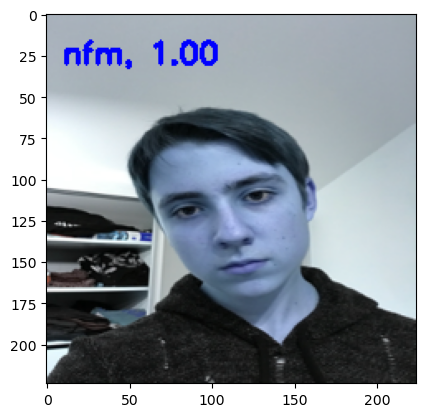

In [64]:
# Load the image and preprocess it
img = cv2.imread("/kaggle/input/image-data/9.png")
img = cv2.resize(img, (224, 224))
img_array = np.expand_dims(img, axis=0)
img_array = img_array.astype('float32') / 255.0

prediction = model.predict(img_array)

# Get the predicted class and probability
class_names = ['cloth', 'n95', 'n95v', 'nfm', 'srg'] # replace with your class names
predicted_class = class_names[np.argmax(prediction)]
predicted_prob = np.max(prediction)
# Draw the predicted class and probability on the image
#img = cv2.imread("/kaggle/input/image-data/1.jpg")
cv2.putText(img, f'{predicted_class}, {predicted_prob:.2f}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# Display the input image and predicted class
plt.imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()